<b>Crop price prediction(wheat price of Punjab)<b>

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path="gdrive/My Drive/Hackathon/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
!ls "gdrive/My Drive/Hackathon/"

 api.py				    new_wheat.csv
'Copy of Future_prediction.ipynb'   oldfiles
'Copy of preprocessing.ipynb'	    predict
 data				    predictednew_wheat.csvp
'Design Document.gdoc'		    predictiongraph.png
'Design link.gdoc'		    raw_wheat.csv
'Final PPT.gslides'		    sarimax.pkl
'front-end & back-end'		    Shehack.sqlite3
 main.py			   'TEAM - The_ Triad   idea.gdoc'
 modified_backend		    wheat.csv


In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("gdrive/My Drive/Hackathon/new_wheat.csv",skipinitialspace=True, usecols=fields)

In [0]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [0]:
df=df.set_index('Price_Date')

In [37]:
df.head(2)

,Modal_Price
Price_Date,
2014-04-15,1400
2014-04-16,1400


In [0]:
data = df.copy()
y = data

In [39]:
y

,Modal_Price
Price_Date,
2014-04-15,1400
2014-04-16,1400
2014-04-17,1400
2014-04-18,1400
2014-04-19,1400
...,...
2017-05-06,1625
2017-05-09,1625
2017-05-10,1625


In [40]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2014-04-01    1400.000000
2014-05-01    1400.185185
2014-06-01    1410.000000
2014-07-01    1410.000000
2014-08-01    1450.000000
2014-09-01    1450.000000
2014-10-01    1450.000000
2014-11-01    1450.000000
2014-12-01    1450.000000
2015-01-01    1450.000000
2015-02-01    1450.000000
2015-03-01    1450.000000
2015-04-01    1450.000000
2015-05-01    1450.000000
2015-06-01    1525.000000
2015-07-01    1525.000000
2015-08-01    1525.000000
2015-09-01    1525.000000
2015-10-01    1525.000000
2015-11-01    1525.000000
2015-12-01    1525.000000
2016-01-01    1525.000000
2016-02-01    1525.000000
2016-03-01    1525.000000
2016-04-01    1525.000000
2016-05-01    1525.000000
2016-06-01    1625.000000
2016-07-01    1625.000000
2016-08-01    1625.000000
2016-09-01    1625.000000
2016-10-01    1625.000000
2016-11-01    1625.000000
2016-12-01    1625.000000
2017-01-01    1625.000000
2017-02-01    1625.000000
2017-03-01    1625.000000
2017-04-01    1625.000000
2017-05-01    1625.000000
F

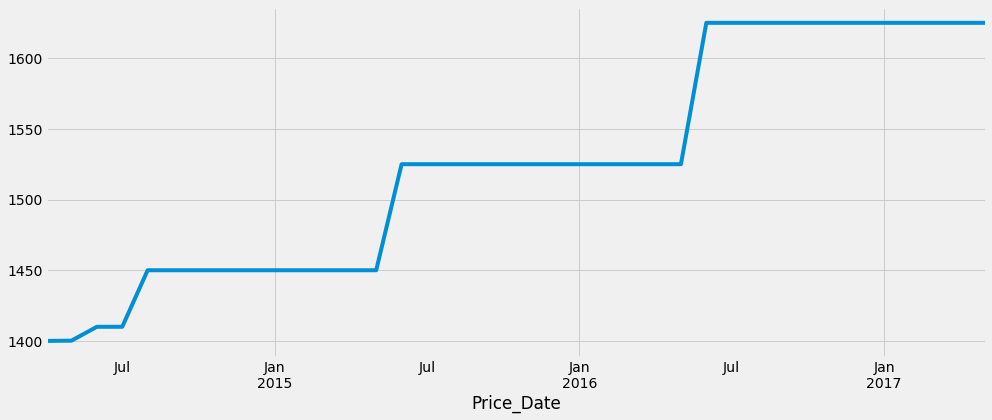

In [41]:
y.plot(figsize=(15, 6))
plt.show()

In [42]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [43]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:649.621314666259
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1050.3160776846216
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:298.2662889185588
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:221.20928563415305
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:214.46618231255502
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:124.05485034928117
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:587.7685076529922
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:259.51347596436244
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:208.1626836557072
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:185.13993677513156
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:118.56718753747622
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:326.5058769787878
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:204.4493465296723
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:213.41904227488445
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:74.3873212160497
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:320.28261

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
results.save("gdrive/My Drive/Hackathon/sarimax.pkl")

In [0]:
loaded=SARIMAXResults.load("gdrive/My Drive/Hackathon/sarimax.pkl")

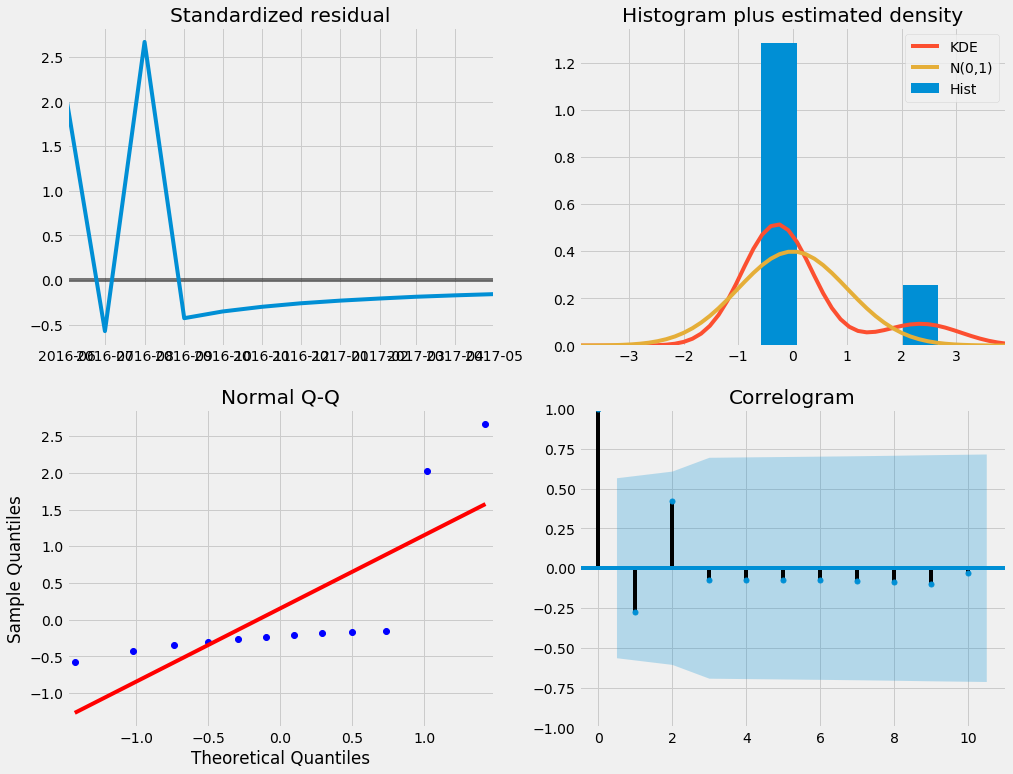

In [46]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

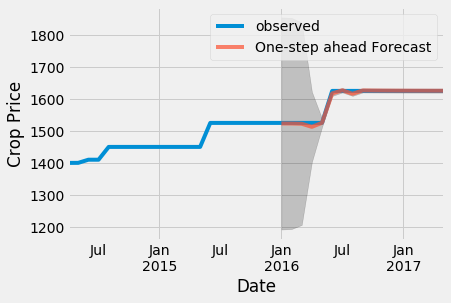

In [48]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 18.79


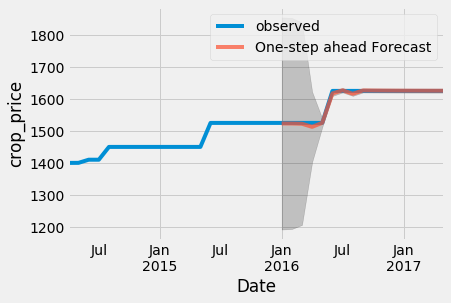

In [50]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [51]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 18.79


In [0]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

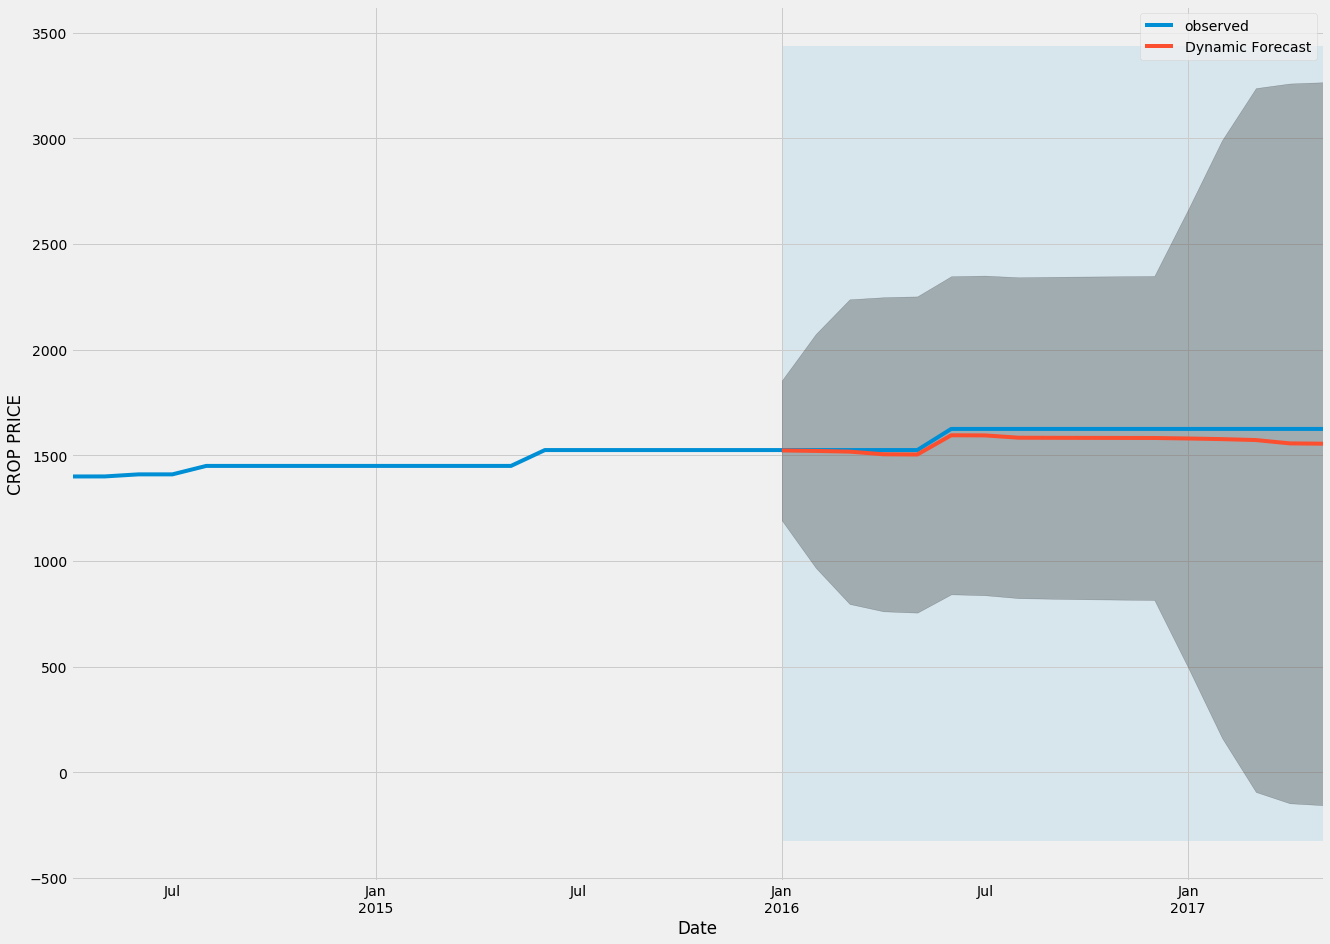

In [53]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [54]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1669.07


<b>Forecast of 20 steps ahead in future<b>

In [0]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

<b>The predicted prices are:<b>

In [56]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,1725.959603,1737.893912
2017-07-01,1724.400165,1740.166076
2017-08-01,1723.504969,1741.628513
2017-09-01,1722.928946,1742.655989
2017-10-01,1722.536289,1743.407947
2017-11-01,1722.258667,1743.971528
2017-12-01,1722.057249,1744.400533
2018-01-01,1721.908269,1744.730644
2018-02-01,1721.796419,1744.986653
2018-03-01,1721.711450,1745.186353


<b>Save the csv in desired location<b>

In [0]:
pred_ci.to_csv("gdrive/My Drive/Hackathon/predictednew_wheat.csvp")

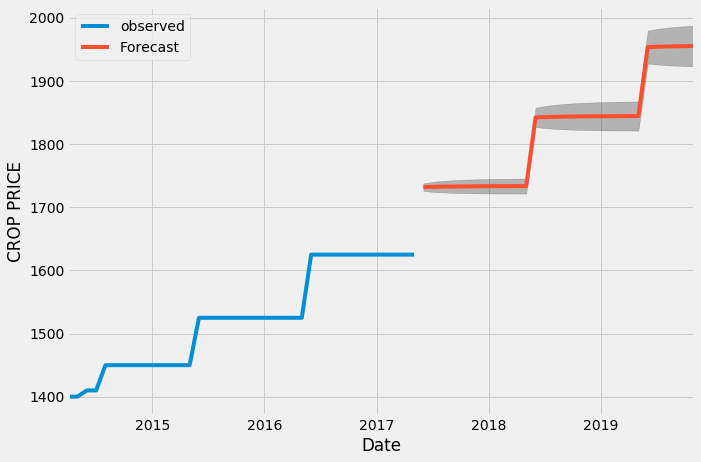

In [64]:
ax = y.plot(label='observed', figsize=(10,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
fig=plt.gcf()
plt.show()
fig.savefig("gdrive/My Drive/Hackathon/predictiongraph.png",bbox_inches='tight')